# Sentiment Analysis Tool on Social Media

# Dataset - 1 (1,62,980 columns)
## Social Media Data (twitter, fb, reddit, etc.)

In [4]:
import pandas as pd
twitter_df = pd.read_csv("social_media_data.csv")
twitter_df.head()

,text,sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [5]:
mapping = {'Negative': -1, 'Neutral': 0, 'Positive' :1}

# Apply the mapping to the column
twitter_df['sentiment'] = twitter_df['sentiment'].map(mapping)


In [6]:
twitter_df.head(10)

,text,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [7]:
twitter_df.shape

(162980, 2)

In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       162976 non-null  object 
 1   sentiment  162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


# Dataset - 2 (2,291 columns)
## Dataset containing recent news blogs (FX Street news channel)

In [9]:
news_df = pd.read_csv("sentiment_annotated_with_texts.csv")
news_df.head()

,published_at,ticker,true_sentiment,title,author,url,source,text,finbert_sentiment,finbert_sent_score
0,2023-01-12 07:47:00,EURCHF,Positive,Euro to benefit from the ECBs pronounced hawki...,FXStreet Insights Team,https://www.fxstreet.com/news/euro-to-benefit-...,FX Street,The Euro was able to appreciate particularly s...,Positive,0.85
1,2023-01-12 10:34:00,EURCHF,Positive,EURCHF Trend higher may remain in place – ING,FXStreet Insights Team,https://www.fxstreet.com/news/eur-chf-trend-hi...,FX Street,EUR/CHF yesterday broke above 1.00. Economists...,Positive,0.51
2,2023-01-12 11:40:00,EURCHF,Neutral,Does a jump in EURCHF point to a break above 1...,FXStreet Insights Team,https://www.fxstreet.com/news/does-a-jump-in-e...,FX Street,EUR/CHF vaults parity for the first time since...,Neutral,0.37
3,2023-01-12 15:32:00,EURCHF,Positive,EURCHF could extend its advance back to levels...,FXStreet Insights Team,https://www.fxstreet.com/news/eur-chf-could-ex...,FX Street,EUR/CHF climbs back above parity. Economists a...,Positive,0.64
4,2023-01-13 11:37:00,EURCHF,Positive,EURCHF to head higher towards 10130 and projec...,FXStreet Insights Team,https://www.fxstreet.com/news/eur-chf-to-head-...,FX Street,EUR/CHF has broken out above the sideways rang...,Positive,0.83


In [10]:
news_df = news_df[["text","true_sentiment"]]
news_df

,text,true_sentiment
0,The Euro was able to appreciate particularly s...,Positive
1,EUR/CHF yesterday broke above 1.00. Economists...,Positive
2,EUR/CHF vaults parity for the first time since...,Neutral
3,EUR/CHF climbs back above parity. Economists a...,Positive
4,EUR/CHF has broken out above the sideways rang...,Positive
...,...,...
2286,The GBP/USD pair enters a bullish consolidatio...,Positive
2287,EUR/CHF has turned back lower over the past co...,Negative
2288,The European Central Bank (ECB)downshifted to ...,Neutral
2289,Economists at Credit Suisse discuss GBP outloo...,Positive


In [11]:
news_df = news_df.rename(columns={'true_sentiment': 'sentiment'})
news_df.head()

,text,sentiment
0,The Euro was able to appreciate particularly s...,Positive
1,EUR/CHF yesterday broke above 1.00. Economists...,Positive
2,EUR/CHF vaults parity for the first time since...,Neutral
3,EUR/CHF climbs back above parity. Economists a...,Positive
4,EUR/CHF has broken out above the sideways rang...,Positive


In [12]:
mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}

# Apply the mapping to the column
news_df['sentiment'] = news_df['sentiment'].map(mapping)
news_df.head()

,text,sentiment
0,The Euro was able to appreciate particularly s...,1
1,EUR/CHF yesterday broke above 1.00. Economists...,1
2,EUR/CHF vaults parity for the first time since...,0
3,EUR/CHF climbs back above parity. Economists a...,1
4,EUR/CHF has broken out above the sideways rang...,1


In [13]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2291 non-null   object
 1   sentiment  2291 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.9+ KB


# Combined Dataset (1,65,271 columns)

In [14]:
combined_df = pd.concat([twitter_df, news_df])
combined_df.head()

,text,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165271 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       165267 non-null  object 
 1   sentiment  165264 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.8+ MB


# Removing the missing data

In [16]:
# Drop rows with missing values
combined_df.dropna(inplace=True)

# Remove duplicates
combined_df.drop_duplicates(inplace=True)

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165260 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       165260 non-null  object 
 1   sentiment  165260 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.8+ MB


# Stop Words Removal

In [18]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91949\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning function
combined_df["text"] = combined_df["text"].apply(clean_text)

# Save the cleaned dataset
cleaned_file_path = "Data_Cleaned.csv"
combined_df.to_csv(cleaned_file_path, index=False)

# Display some cleaned text
combined_df.head()

,text,sentiment
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [20]:
combined_df.shape

(165260, 2)

In [21]:
# Remove NaN values in the clean_text column
df_cleaned = combined_df.dropna(subset=["text"])

# Ensure text is treated as a string
df_cleaned["text"] = df_cleaned["text"].astype(str)

df_cleaned.head()

,text,sentiment
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


# TF-IDF vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Split data again after fixing NaNs
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned["text"], df_cleaned["sentiment"], test_size=0.2, random_state=42, stratify=df_cleaned["sentiment"]
)

# Convert text into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display shape of transformed data
X_train_tfidf.shape, X_test_tfidf.shape

((132208, 102063), (33052, 102063))

In [23]:
sample_index = 0  # Choose a document index

# Get the nonzero TF-IDF values for this document
nz_indices = X_train_tfidf[sample_index].nonzero()[1]
nz_tfidf_values = X_train_tfidf[sample_index, nz_indices].toarray()[0]

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Map words to their TF-IDF scores
sample_tfidf = {feature_names[i]: nz_tfidf_values[j] for j, i in enumerate(nz_indices)}


# Vectors after TF-IDF

In [24]:
# Display sorted TF-IDF scores
print(sorted(sample_tfidf.items(), key=lambda x: x[1], reverse=True)[:100])  # Show top 100

for word, score in sorted(sample_tfidf.items(), key=lambda x: x[1], reverse=True)[:100]:
    print(f"{word}: {score:f}")

[('lookafter', 0.461534751251937), ('abhisar', 0.33374748297542306), ('destroying', 0.274699083069892), ('communal', 0.2678153809298574), ('hear', 0.2667605705351923), ('problems', 0.2658468371395823), ('sad', 0.2647346141738465), ('busy', 0.2587604567834275), ('yogi', 0.2501546899761765), ('comments', 0.24926752102828195), ('democracy', 0.22531751455136853), ('hope', 0.21487366810935463), ('rahul', 0.16074385808068561), ('modi', 0.04525001954378917)]
lookafter: 0.461535
abhisar: 0.333747
destroying: 0.274699
communal: 0.267815
hear: 0.266761
problems: 0.265847
sad: 0.264735
busy: 0.258760
yogi: 0.250155
comments: 0.249268
democracy: 0.225318
hope: 0.214874
rahul: 0.160744
modi: 0.045250


In [25]:
# X_train
X_train_tfidf

<132208x102063 sparse matrix of type '<class 'numpy.float64'>'
	with 1983682 stored elements in Compressed Sparse Row format>

In [26]:
X_test_tfidf

<33052x102063 sparse matrix of type '<class 'numpy.float64'>'
	with 486248 stored elements in Compressed Sparse Row format>

In [27]:
# Reduce feature size for faster computation
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report

k = 8000  # Reduce to top 3,000 features
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

# Multinomial Naive Bayes Classifier

In [25]:
# Reduce dataset size for faster computation
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB

subset_size = 10000  # Use only 20,000 samples
X_train_small, y_train_small = resample(X_train_selected, y_train, n_samples=subset_size, random_state=42)

# Train and evaluate Naive Bayes (fastest for text data)
nb_model = MultinomialNB()
nb_model.fit(X_train_small, y_train_small)
y_pred_nb = nb_model.predict(X_test_selected)

# Get classification report
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.04      0.08      7244
         0.0       0.80      0.21      0.33     11205
         1.0       0.48      0.98      0.65     14603

    accuracy                           0.51     33052
   macro avg       0.75      0.41      0.35     33052
weighted avg       0.69      0.51      0.41     33052



# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_small, y_train_small)
y_pred_dt = dt_model.predict(X_test_selected)

# Get classification reports
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

# Display reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Classification Report:
              precision    recall  f1-score   support

        -1.0       0.58      0.45      0.51      7244
         0.0       0.65      0.77      0.71     11205
         1.0       0.74      0.71      0.73     14603

    accuracy                           0.68     33052
   macro avg       0.66      0.65      0.65     33052
weighted avg       0.67      0.68      0.67     33052



# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
rf_model.fit(X_train_small, y_train_small)
y_pred_rf = rf_model.predict(X_test_selected)

rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.45      0.59      7244
         0.0       0.71      0.90      0.79     11205
         1.0       0.79      0.81      0.80     14603

    accuracy                           0.76     33052
   macro avg       0.78      0.72      0.73     33052
weighted avg       0.77      0.76      0.75     33052



# LSTM Model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [38]:
# Tokenize and pad sequences
max_words = 5000  # Limit vocabulary size
max_len = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)  # Fit on training data
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [39]:
import numpy as np
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")
X_train_pad = np.array(X_train_pad, dtype=np.int32)
X_test_pad = np.array(X_test_pad, dtype=np.int32)

In [40]:
# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [ ]:
# Build LSTM model
# lstm_model = Sequential([
#     Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
#     SpatialDropout1D(0.2),
#     LSTM(100, dropout=0.2, recurrent_dropout=0.2),
#     Dense(4, activation="softmax")  # 4 sentiment categories
# ])

In [ ]:
# lstm_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train LSTM
# lstm_model.fit(X_train_pad, y_train_enc, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_enc))

# lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test_enc, verbose=1)
# lstm_accuracy

# Bidirectional LSTM model

In [32]:
from tensorflow.keras.layers import Bidirectional

# Rebuild LSTM model with improvements
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=200, input_length=max_len),  # Increased embedding size
    SpatialDropout1D(0.3),  # Increased dropout to prevent overfitting
    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),  # First BiLSTM layer
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),  # Second BiLSTM layer
    Dense(64, activation="relu"),  # Fully connected layer for learning complex features
    Dense(4, activation="softmax")  # Output layer with 4 sentiment categories
])

lstm_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

C:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
# Train the improved LSTM model
history = lstm_model.fit(
    X_train_pad, y_train_enc, 
    epochs=8, batch_size=32,  # Increased epochs and reduced batch size for better learning
    validation_data=(X_test_pad, y_test_enc),
    verbose=1
)

Epoch 1/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 6493s 2s/step - accuracy: 0.7697 - loss: 0.5727 - val_accuracy: 0.8945 - val_loss: 0.3378
Epoch 2/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 8818s 2s/step - accuracy: 0.8961 - loss: 0.3302 - val_accuracy: 0.8972 - val_loss: 0.3285
Epoch 3/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 2827s 684ms/step - accuracy: 0.9015 - loss: 0.3080 - val_accuracy: 0.8983 - val_loss: 0.3231
Epoch 4/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 2880s 697ms/step - accuracy: 0.9059 - loss: 0.2886 - val_accuracy: 0.8985 - val_loss: 0.3237
Epoch 5/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 2969s 718ms/step - accuracy: 0.9094 - loss: 0.2707 - val_accuracy: 0.8975 - val_loss: 0.3303
Epoch 6/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 3067s 729ms/step - accuracy: 0.9156 - loss: 0.2518 - val_accuracy: 0.8955 - val_loss: 0.3348
Epoch 7/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 3045s 737ms/step - accuracy: 0.9170 - loss: 0.2425 - val_accuracy: 0.8956 - val_loss: 0.3420
Epoch 8/8
4132/4132 ━━━━━━━━━━━━━━━━━━━━ 3770s 912ms/step - accuracy

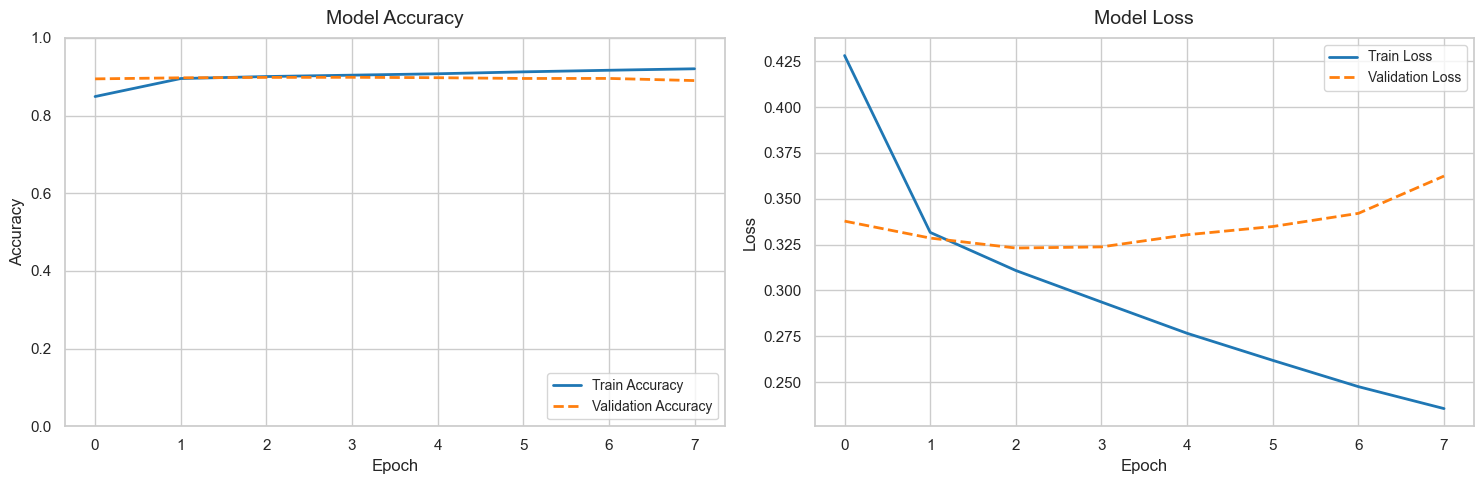

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot training & validation accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', linestyle='--', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14, pad=10)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.legend(loc='lower right', fontsize=10)
    ax1.set_ylim([0, 1])  # Set y-axis limits for accuracy
    
    # Plot training & validation loss
    ax2.plot(history.history['loss'], label='Train Loss', color='#1f77b4', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='#ff7f0e', linestyle='--', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14, pad=10)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.legend(loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function after training
plot_training_history(history)

## LSTM Accuracy

In [41]:
# Evaluate the improved LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test_enc, verbose=1)
lstm_accuracy

1033/1033 ━━━━━━━━━━━━━━━━━━━━ 299s 290ms/step - accuracy: 0.8908 - loss: 0.3567


0.8900822997093201

In [46]:
lstm_model.save('lstm_model.h5')

# Extracting Facial sentiment using MobileNet model

In [42]:
# 📦 Imports
import easyocr
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
import cv2
from keras.preprocessing.sequence import pad_sequences

In [43]:
# 🔤 Load OCR
ocr_reader = easyocr.Reader(['en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [44]:
# 📷 Image Preprocessing (for OCR)
def extract_text_from_image(image_path):
    results = ocr_reader.readtext(image_path)
    extracted_text = " ".join([res[1] for res in results])
    return extracted_text


In [45]:
# 📊 Text Sentiment using LSTM
def predict_text_sentiment(text, tokenizer, lstm_model, max_len=100):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    preds = lstm_model.predict(padded, verbose=0)
    label = np.argmax(preds[0])
    conf = preds[0][label]
    label_map = {0: "Negative", 1: "Happy", 2: "Neutral", 3: "Sad"}
    return label_map[label], conf


In [46]:
# 🧠 MobileNetV2 Model for Facial Expression Recognition
class MobileNetEmotion(nn.Module):
    def __init__(self, num_classes=7):
        super(MobileNetEmotion, self).__init__()
        self.base_model = models.mobilenet_v2(weights=None)  # No pretrained weights for emotions
        self.base_model.classifier[1] = nn.Linear(self.base_model.last_channel, num_classes)
        
    def forward(self, x):
        return self.base_model(x)


In [47]:
# ⚙️ Device and Model Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_model = MobileNetEmotion(num_classes=7).to(device)

# (Optional) Load pretrained emotion weights
# face_model.load_state_dict(torch.load('mobilenet_emotion.pth', map_location=device))
face_model.eval()


MobileNetEmotion(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel

In [48]:
# 📈 Transform for face images (Important: MobileNet expects 3-channel input 224x224)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])


In [49]:
from deepface import DeepFace

def predict_facial_sentiment(image_path):
    try:
        analysis = DeepFace.analyze(img_path=image_path, actions=['emotion'])
        emotion = analysis[0]['dominant_emotion']

        label_map = {
            "angry": "Negative",
            "disgust": "Negative",
            "fear": "Negative",
            "sad": "Negative",
            "happy": "Positive",
            "surprise": "Positive",
            "neutral": "Neutral"
        }
        sentiment = label_map.get(emotion.lower(), "Neutral")
        confidence = analysis[0]['emotion'][emotion]

        return sentiment, confidence / 100  # Normalize to [0, 1]
    except Exception as e:
        print(f"DeepFace error: {e}")
        return "Neutral", 0.5


In [50]:
# 🔥 Fusion of both sentiments
def fuse_sentiments(text_label, text_conf, face_label, face_conf):
    sentiment_score = {"Anger": -1, "Sad": -0.5, "Neutral": 0, "Happy": 1,
                       "Negative": -1, "Positive": 1}
    
    text_score = sentiment_score.get(text_label, 0) * text_conf
    face_score = sentiment_score.get(face_label, 0) * face_conf
    
    combined_score = (text_score + face_score) / (text_conf + face_conf)
    
    if combined_score >= 0.5:
        return "Positive"
    elif combined_score <= -0.5:
        return "Negative"
    else:
        return "Neutral"


# Final Results

In [52]:
# Example usage
image_path = "img3.jpg"
text_from_image = extract_text_from_image(image_path)

text_label, text_conf = predict_text_sentiment(text_from_image, tokenizer, lstm_model)
face_label, face_conf = predict_facial_sentiment(image_path)

final_sentiment = fuse_sentiments(text_label, text_conf, face_label, face_conf)
print(f"Text Sentiment: {text_label} (confidence: {text_conf:.2f})")
print(f"Face Sentiment: {face_label} (confidence: {face_conf:.2f})")
print(f"Final Sentiment: {final_sentiment}")


Text Sentiment: Neutral (confidence: 1.00)
Face Sentiment: Positive (confidence: 1.00)
Final Sentiment: Positive


In [49]:
# At the end of your notebook
import pickle

# Create a dictionary with all needed components
to_pickle = {
    'tokenizer': tokenizer,
    'model': lstm_model
}

with open('sentiment_analyzer.pkl', 'wb') as f:
    pickle.dump(to_pickle, f)